In [1]:
# import packages
import pandas as pd
import numpy as np
import plotly.express as px
import copy

In [2]:
# import vacancy data into a dataframe
df_vacant = pd.read_excel('Vacancies.xlsx')
df_vacant["fiscal_year"] = df_vacant["fiscal_year"].astype(str) # convert the fiscal year into a string type
df_vacant.head()

department  job_count  sum_total_vacant_months  \
0      Employees' Retirement Systems         77                      254   
1                        Comptroller        106                      288   
2                             Health        798                     2045   
3  Housing and Community Development        433                     1016   
4             Office of Civil Rights         21                       49   

   sum_vacant  avg_of_vacant  percent_total_months_vacant fiscal_year  
0          29       0.376623                     0.274892        2019  
1          33       0.311321                     0.226415        2019  
2         265       0.332080                     0.213555        2019  
3         151       0.348730                     0.195535        2019  
4           9       0.428571                     0.194444        2019

In [3]:
# multiply vacancy rates and proportion of months vacant by 100 to turn them into percentages
df_vacant["avg_of_vacant"] = df_vacant["avg_of_vacant"]*100 
df_vacant["percent_total_months_vacant"] = df_vacant["percent_total_months_vacant"]*100

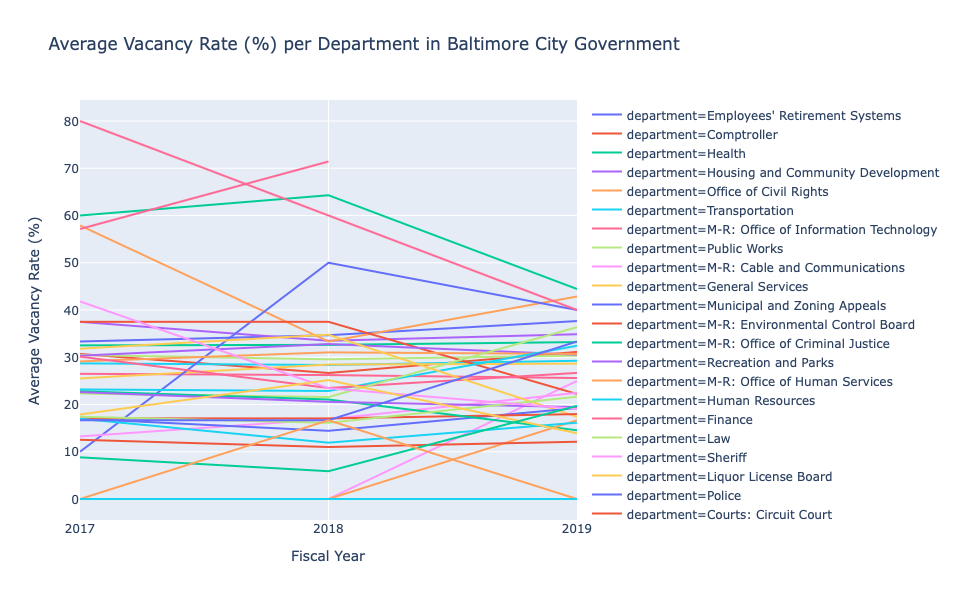

In [4]:
# create a line graph showing vacancy rates per department over time
line_dept_vacancies = px.line(df_vacant,
                             x = "fiscal_year",
                             y = "avg_of_vacant",
                            color = "department",
                             title = "Average Vacancy Rate (%) per Department in Baltimore City Government",
                             labels = {"fiscal_year": "Fiscal Year",
                              "avg_of_vacant": "Average Vacancy Rate (%)"})
line_dept_vacancies.update_xaxes(tick0=2017, dtick=1) # ensure axes are integer values

In [ ]:
# export graph as html file
line_dept_vacancies.write_html('line_all_dept_vacancies.html', auto_open = True)

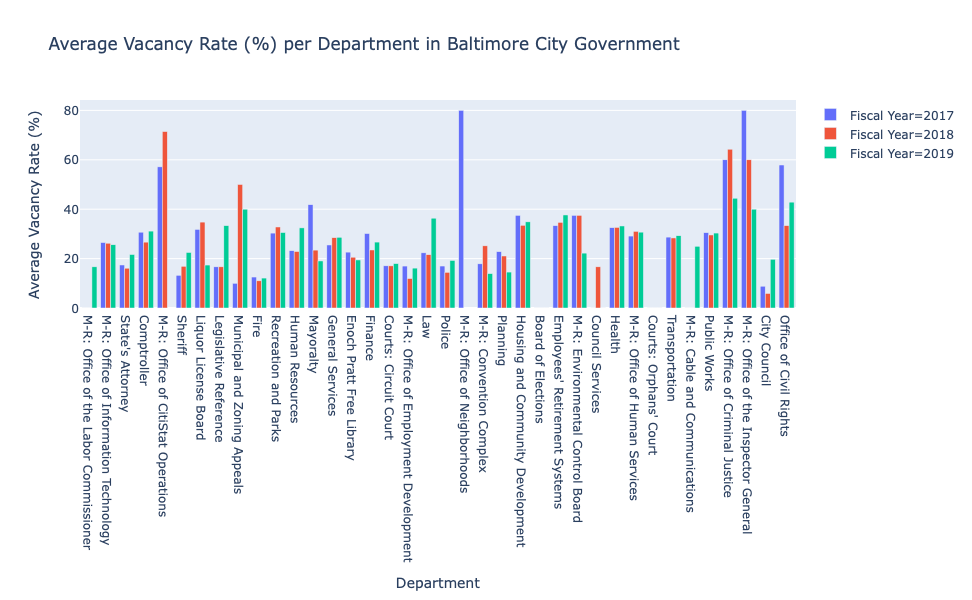

In [21]:
# create a bar graph showing vacancy rates per department over time
bar_vacancies = px.bar(df_vacant.sort_values(by = "fiscal_year", ascending = True),
                    x = "department", 
                    y = "avg_of_vacant", 
                    color = "fiscal_year", 
                    hover_name = "avg_of_vacant",
                    barmode = "group",
                    title = "Average Vacancy Rate (%) per Department in Baltimore City Government",
                    labels = {"fiscal_year": "Fiscal Year", "avg_of_vacant": "Average Vacancy Rate (%)", 
                              "department":"Department"})
bar_vacancies.update_layout(barmode="group") # turn layout from stacked columns into grouped columns

# to see the bar graphs of each fiscal year separately
# bar_vacancies_yearly = px.bar(df_vacant,
#                     x = "department", 
#                     y = "avg_of_vacant", 
#                     color = "fiscal_year"
#                     facet_row = "fiscal_year", 
#                     hover_name = "avg_of_vacant",
#                     title = "Average Vacancy Rate (%) per Department in Baltimore City Government", 
#                     labels = {"fiscal_year": "Fiscal Year",
#                              "avg_of_vacant": "Average Vacancy Rate (%)", "department":"Department"})

In [ ]:
# export graph as html file
bar_vacancies.write_html('bar_all_dept_vacancies.html', auto_open = True)

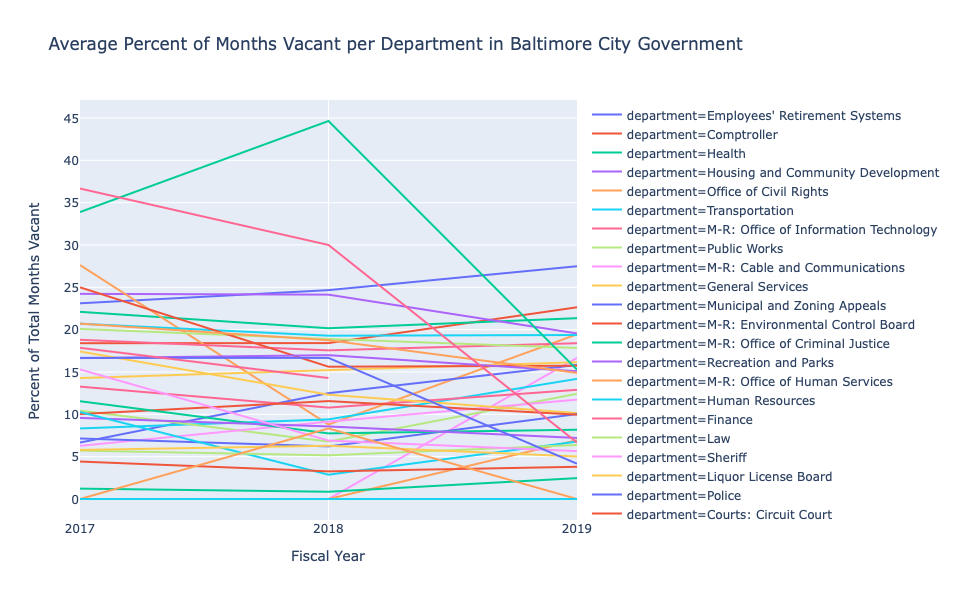

In [6]:
# create a line graph showing average duration of vacancy by department over time
line_dept_vacant_months = px.line(df_vacant,
                             x = "fiscal_year",
                             y = "percent_total_months_vacant",
                             color = "department",
                             title = "Average Percent of Months Vacant per Department in Baltimore City Government",
                             labels = {"fiscal_year": "Fiscal Year",
                              "percent_total_months_vacant": "Percent of Total Months Vacant"})
line_dept_vacant_months.update_xaxes(tick0=2017, dtick=1)

In [ ]:
# export graph as html file
line_dept_vacant_months.write_html('line_all_dept_vacant_months.html', auto_open = True)

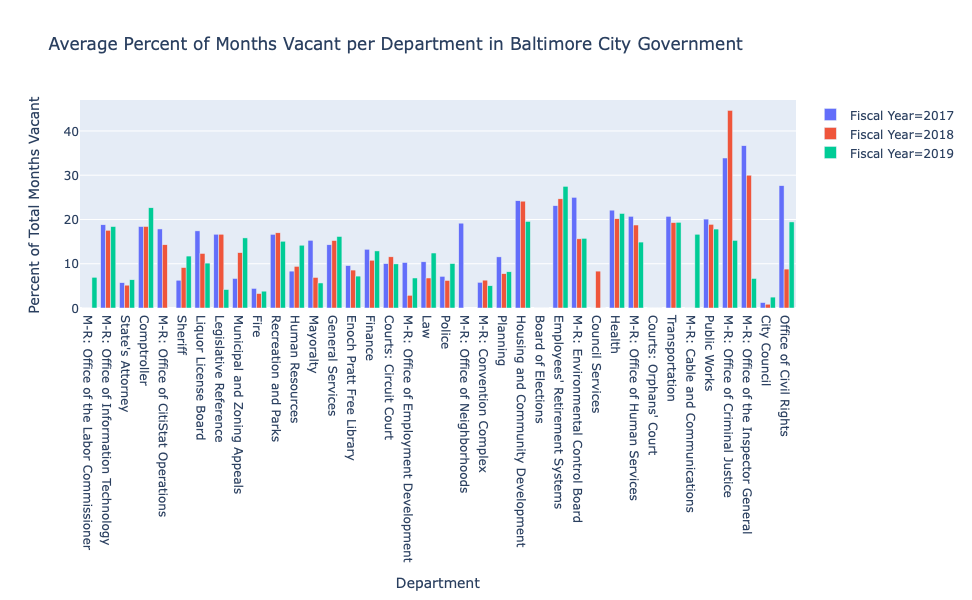

In [22]:
# create bar graph of the average duration of vacancies by department over time
bar_vacant_months = px.bar(df_vacant.sort_values(by = "fiscal_year", ascending = True),
                    x = "department", 
                    y = "percent_total_months_vacant", 
                    color = "fiscal_year", 
                    hover_name = "percent_total_months_vacant",
                    barmode = "group",
                    title = "Average Percent of Months Vacant per Department in Baltimore City Government",
                    labels = {"fiscal_year": "Fiscal Year",
                              "percent_total_months_vacant": "Percent of Total Months Vacant", "department":"Department"})
bar_vacant_months.update_layout(barmode="group")

# to see the bar graphs of each fiscal year separately
# bar_vacant_months_yearly = px.bar(df_vacant,
#                     x = "department", 
#                     y = "percent_total_months_vacant", 
#                     color = "fiscal_year"
#                    facet_row = "fiscal_year", 
#                     hover_name = "percent_total_months_vacant",
#                    title = "Average Percent of Months Vacant per Department in Baltimore City Government",
#                    labels = {"fiscal_year": "Fiscal Year",
#                              "percent_total_months_vacant": "Percent of Total Months Vacant", "department":"Department"})

In [ ]:
# export graph as html
bar_vacant_months.write_html('bar_all_dept_vacant_months.html', auto_open = True)

# Sorting Departments by Absolute Greatest Values

In [8]:
# sort the departments by greatest (absolute) vacancy rate (for any given year)
df_vacant = df_vacant.sort_values(by = "avg_of_vacant", ascending = False).reset_index()
df_top_vacant_dept = df_vacant.head(5)["department"] # assign the names of the top 5 departments to a new dataframe
df_top_vacant_dept

0            M-R: Office of Neighborhoods
1    M-R: Office of the Inspector General
2      M-R: Office of CitiStat Operations
3         M-R: Office of Criminal Justice
4         M-R: Office of Criminal Justice
Name: department, dtype: object

In [9]:
# sort the departments by greatest (absolute) vacancy duration (for any given year)
df_vacant = df_vacant.sort_values(by = "percent_total_months_vacant", ascending = False).reset_index()
df_top_vacant_months_dept = df_vacant.head(5)["department"] # assign the names of the top 5 departments to a new dataframe
df_top_vacant_months_dept

0         M-R: Office of Criminal Justice
1    M-R: Office of the Inspector General
2         M-R: Office of Criminal Justice
3    M-R: Office of the Inspector General
4                  Office of Civil Rights
Name: department, dtype: object

# Sorting Values by Average Greatest Values

In [10]:
# create a new pivot table to find the average value of vacancy rate and duration across all three years for each dept
df_avg_vacant = pd.pivot_table(df_vacant,
                            index = "department",  # index by department name
                            values = ["avg_of_vacant", "percent_total_months_vacant"],
                            aggfunc = np.average).reset_index() # find avg of these metrics
# sort by highest average vacancy duration and assign the names of the top 5 departments to a new dataframe
df_top_avg_vacant_months = df_avg_vacant.sort_values(by = "percent_total_months_vacant", ascending = False)["department"].head(5)
df_top_avg_vacant_months
# concatenate these departments with the top 5 departments measured by absolute vacancy duration
df_top_vacant_months_dept = df_top_vacant_months_dept.append(df_top_avg_vacant_months, ignore_index = True)
df_top_vacant_months_dept

0         M-R: Office of Criminal Justice
1    M-R: Office of the Inspector General
2         M-R: Office of Criminal Justice
3    M-R: Office of the Inspector General
4                  Office of Civil Rights
5         M-R: Office of Criminal Justice
6           Employees' Retirement Systems
7    M-R: Office of the Inspector General
8       Housing and Community Development
9                                  Health
Name: department, dtype: object

In [11]:
# sort by highest average vacancy rate and assign the names of the top 5 departments to a new dataframe
df_top_avg_vacant = df_avg_vacant.sort_values(by = "avg_of_vacant", ascending = False)["department"].head(5)
df_top_avg_vacant
# concatenate these departments with the top 5 departments measured by absolute vacancy rate
df_top_vacant_dept = df_top_vacant_dept.append(df_top_avg_vacant, ignore_index = True)
df_top_vacant_dept

0            M-R: Office of Neighborhoods
1    M-R: Office of the Inspector General
2      M-R: Office of CitiStat Operations
3         M-R: Office of Criminal Justice
4         M-R: Office of Criminal Justice
5            M-R: Office of Neighborhoods
6      M-R: Office of CitiStat Operations
7    M-R: Office of the Inspector General
8         M-R: Office of Criminal Justice
9                  Office of Civil Rights
Name: department, dtype: object

# Extract the data for the top worst performing depts for both metrics

In [12]:
# remove duplicates from the lists of top departments in vacancy rate
df_top_vacant_dept = list(set(df_top_vacant_dept))
df_top_vacant_dept

['Office of Civil Rights',
 'M-R: Office of Criminal Justice',
 'M-R: Office of Neighborhoods',
 'M-R: Office of CitiStat Operations',
 'M-R: Office of the Inspector General']

In [13]:
# remove duplicates from the lists of top departments in vacancy duration
df_top_vacant_months_dept = list(set(df_top_vacant_months_dept))
df_top_vacant_months_dept

['Office of Civil Rights',
 'M-R: Office of Criminal Justice',
 'Housing and Community Development',
 'Health',
 'M-R: Office of the Inspector General',
 "Employees' Retirement Systems"]

In [14]:
# extract the entries from the original dataframe that correspond to the top depts by vacancy rate
df_top_vacant = df_vacant.loc[df_vacant['department'].isin(df_top_vacant_dept)]
df_top_vacant = df_top_vacant.sort_values(by = "fiscal_year", ascending = True) # sort by fiscal year

In [15]:
# extract the entries from the original dataframe that correspond to the top depts by vacancy duration
df_top_vacant_months = df_vacant.loc[df_vacant['department'].isin(df_top_vacant_months_dept)]
df_top_vacant_months = df_top_vacant_months.sort_values(by = "fiscal_year", ascending = True) # sort by fiscal year

# Graph the top departments for both metrics

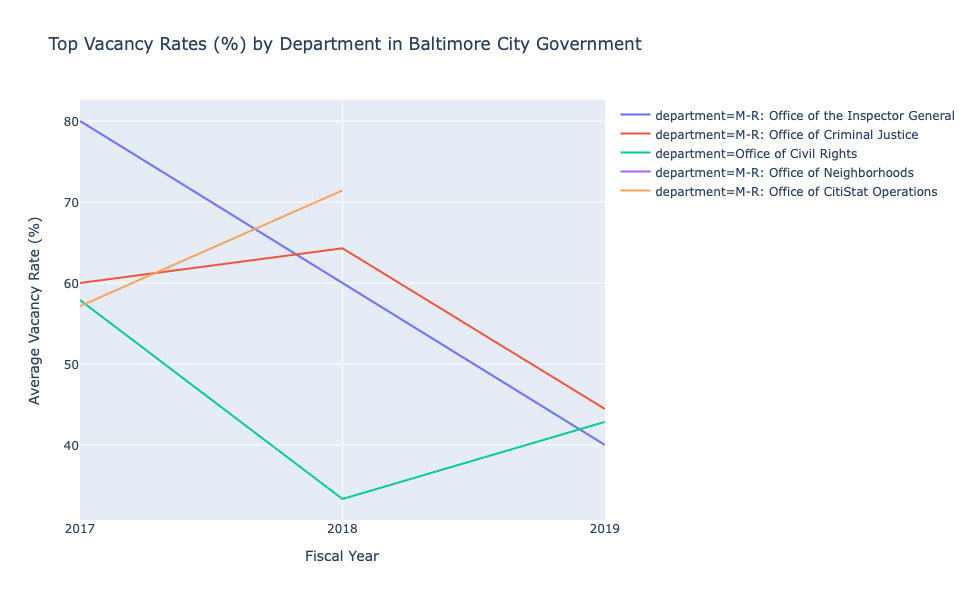

In [16]:
# create a line graph showing average vacancy rate for the top departments over time
line_dept_top_vacancies = px.line(df_top_vacant,
                             x = "fiscal_year",
                             y = "avg_of_vacant",
                            color = "department",
                             title = "Top Vacancy Rates (%) by Department in Baltimore City Government",
                             labels = {"fiscal_year": "Fiscal Year",
                              "avg_of_vacant": "Average Vacancy Rate (%)"})
line_dept_top_vacancies.update_xaxes(tick0=2017, dtick=1)

In [ ]:
# export as html
line_dept_top_vacancies.write_html('line_top_dept_vacancies.html', auto_open = True)

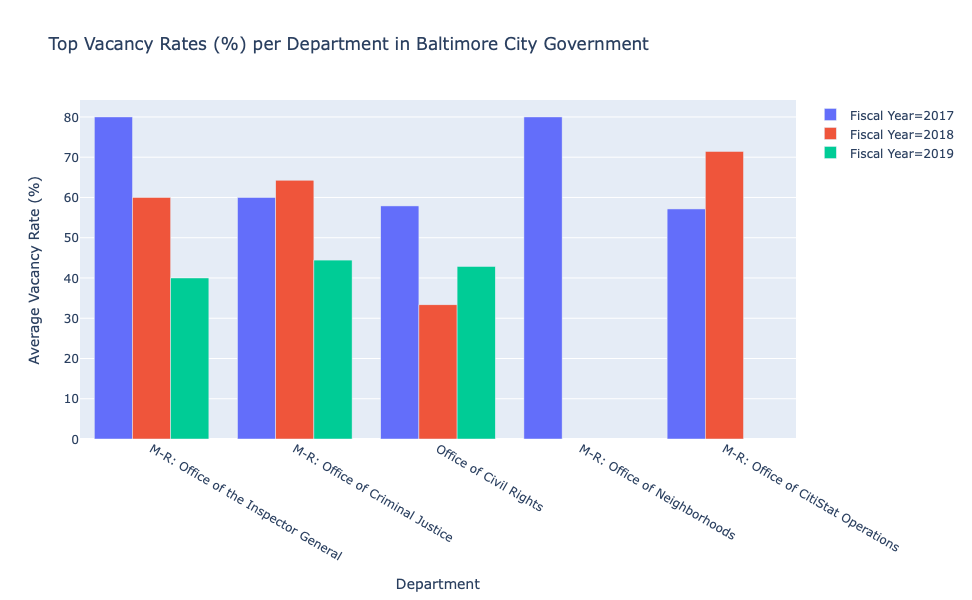

In [17]:
# create a bar graph showing average vacancy rate for the top departments over time
bar_top_vacancies = px.bar(df_top_vacant,
                     x = "department", 
                     y = "avg_of_vacant", 
                    color = "fiscal_year", 
                     hover_name = "avg_of_vacant",
                   barmode = "group",
                    title = "Top Vacancy Rates (%) per Department in Baltimore City Government",
                             labels = {"fiscal_year": "Fiscal Year",
                              "avg_of_vacant": "Average Vacancy Rate (%)", "department":"Department"})
bar_top_vacancies.update_layout(barmode="group")
bar_top_vacancies.update_xaxes(categoryorder = "array")


# to see the bar graph with separate years
# bar_top_vacancies_yearly = px.bar(df_top_vacant,
#                     x = "department", 
#                     y = "avg_of_vacant", 
#                     color = "fiscal_year"
#                    facet_row = "fiscal_year", 
#                     hover_name = "avg_of_vacant",
#                    title = "Top Vacancy Rates (%) per Department in Baltimore City Government", 
#                    labels = {"fiscal_year": "Fiscal Year",
#                              "avg_of_vacant": "Average Vacancy Rate (%)", "department":"Department"})

In [ ]:
# export as html
bar_top_vacancies.write_html('bar_top_vacancies.html', auto_open = True)

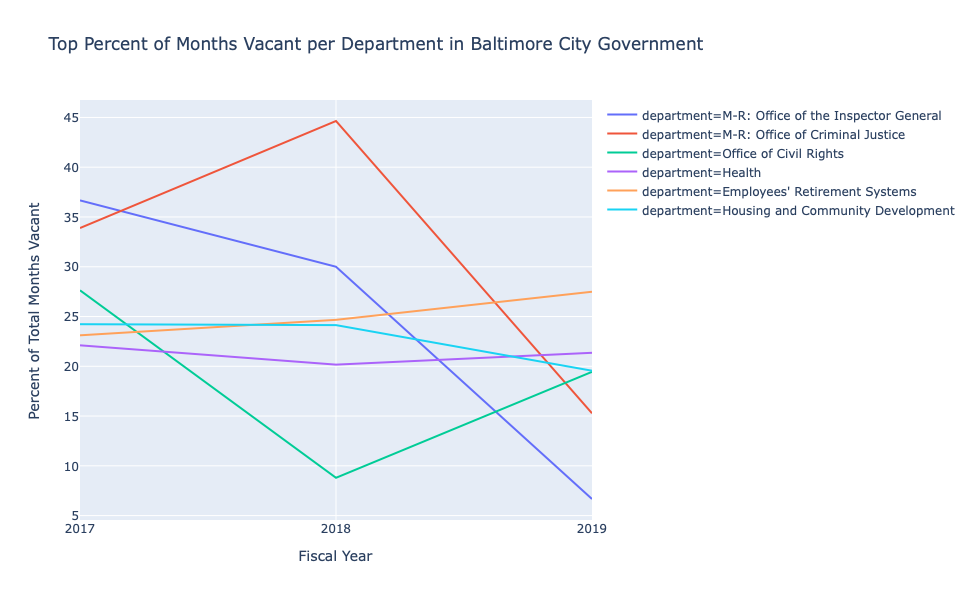

In [18]:
# create a line graph showing average vacancy duration for the top departments over time

line_dept_top_vacant_months = px.line(df_top_vacant_months,
                             x = "fiscal_year",
                             y = "percent_total_months_vacant",
                            color = "department",
                             title = "Top Percent of Months Vacant per Department in Baltimore City Government",
                                 labels = {"fiscal_year": "Fiscal Year",
                              "percent_total_months_vacant": "Percent of Total Months Vacant"})
line_dept_top_vacant_months.update_xaxes(tick0=2017, dtick=1)

In [ ]:
# export as html
line_dept_top_vacant_months.write_html('line_top_dept_vacant_months.html', auto_open = True)

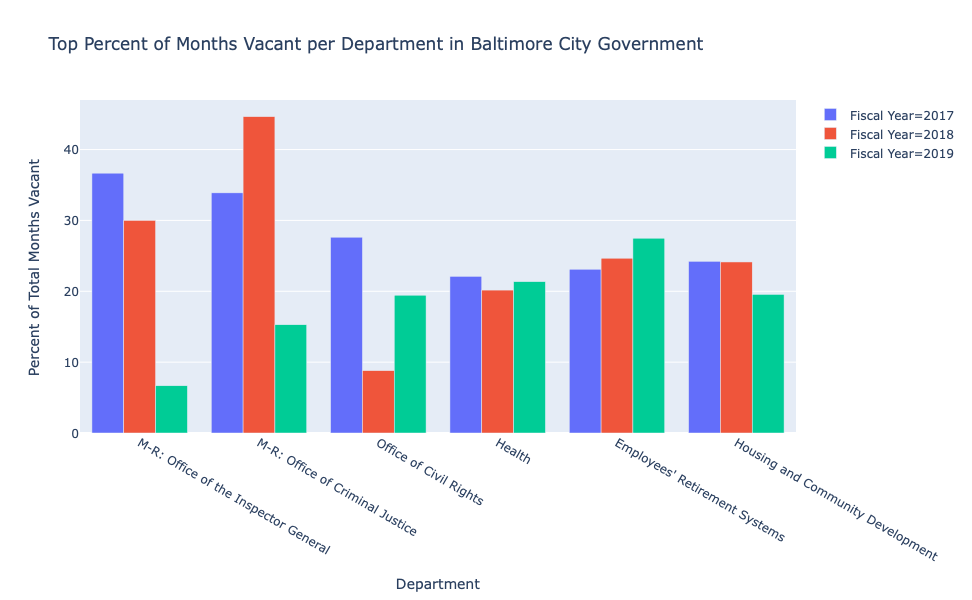

In [19]:
# create a bar graph showing average vacancy duration for the top departments over time

bar_top_vacant_months = px.bar(df_top_vacant_months, 
                    x = "department", 
                    y = "percent_total_months_vacant", 
                    color = "fiscal_year", 
                    hover_name = "percent_total_months_vacant",
                    barmode = "group",
                    title = "Top Percent of Months Vacant per Department in Baltimore City Government",
                    labels = {"fiscal_year": "Fiscal Year",
                              "percent_total_months_vacant": "Percent of Total Months Vacant", "department":"Department"})
bar_top_vacant_months.update_layout(barmode="group")

# to see the bar graph with separate years
# bar_top_vacant_months_yearly = px.bar(df_top_vacant_months,
#                     x = "department", 
#                     y = "percent_total_months_vacant", 
#                     color = "fiscal_year"
#                    facet_row = "fiscal_year", 
#                     hover_name = "percent_total_months_vacant",
#                    title = "Top Percent of Months Vacant per Department in Baltimore City Government",
#                    labels = {"fiscal_year": "Fiscal Year",
#                              "percent_total_months_vacant": "Percent of Total Months Vacant", "department":"Department"})

In [ ]:
# export as html
bar_top_vacant_months.write_html('bar_top_vacant_months.html', auto_open = True)

# M-R Aggregation Below

In [ ]:
# for data visualization purposes, let's aggregate all of the M-R offices together. However, since Lillian said she wants 
# us to analyze the M-R offices separately, we will have to keep the original unaggregated data. To avoid changing the 
# original unaggregated data, we will make a copy of it (named df_vacantagg) to use in our visualizations.
df_vacantagg = copy.copy(df_vacant) # copy dataframe
df_vacant["department"].nunique() # find the number of unique departments

In [ ]:
# if the department is a Mayor's Office dpt, we will merge it with the other Mayor's Office departments. To do so, we first must 
# change all of the Mayor's Office department names to 'M-R' by splitting along the ':' sign.

df_vacantagg["department"] =  np.where((df_vacantagg["department"]).str.contains('M-R'),
                                        df_vacantagg["department"].str.split(":", expand=True)[0],
                                        df_vacantagg["department"])

df_vacantagg["department"].nunique() # check that this has reduced the number of unique department names

In [ ]:
df_MR = df_vacantagg[df_vacantagg["department"]=='M-R'] # create a new df with all the rows designated by M-R
df_MR

In [ ]:
# to aggregate the data of the M-R offices, we have to sum the job count, sum of months, and sum of vacant months across
# the rows by each fiscal year, and find the aggregate avgs for average vacancy and percent of months vacant per fiscal year.
# To do this, we can use a pivot table to find aggregate sums by year, and calculate the aggregate averages with formulas

# First, we will create a pivot table to find sum of vacant months and positions per year
df_MR_total = pd.pivot_table(df_MR,
                            index = "fiscal_year",  # index by fiscal year
                            values = ["job_count", "sum_total_vacant_months","sum_vacant"],
                            aggfunc = np.sum).reset_index() # find sum of these parameters
df_MR_total

In [ ]:
# next we have to calculate the aggregate average vacancy and percent of total months vacant
df_MR_total["avg_of_vacant"] = df_MR_total["sum_vacant"]/df_MR_total["job_count"]
df_MR_total["percent_total_months_vacant"] = df_MR_total["sum_total_vacant_months"]/(df_MR_total["job_count"]*12)

In [ ]:
df_MR_total["department"] = "M-R Aggregated" # rename the department as 'M-R Aggregated'
df_MR_total

In [ ]:
# add the new aggregated information for 'M-R aggregated' to the vacancies dataframe
df_vacantagg = df_vacantagg.append(df_MR_total, ignore_index = True, sort=True)

In [ ]:
# delete all of the old (unaggregated) 'M-R' entries from the vacancies dataframe
df_vacantagg = df_vacantagg[df_vacantagg["department"] != 'M-R']
df_vacantagg.info() # check that the number of entries in the vacancy dataframe has decreased

In [ ]:
# create a line graph showing average vacancies per department over time for aggregated dataset
line_dept_vacanciesagg = px.line(df_vacantagg,
                             x = "fiscal_year",
                             y = "avg_of_vacant",
                            color = "department",
                             title = "Average Vacancies per Department in Baltimore City Government (AGG)",
                             labels = {"fiscal_year": "Fiscal Year",
                              "avg_of_vacant": "Average Vacancies per Department"})

In [ ]:
line_dept_vacanciesagg

In [ ]:
# create a line graph showing average duration of vacancy by department over time
line_dept_vacant_monthsagg = px.line(df_vacantagg,
                             x = "fiscal_year",
                             y = "percent_total_months_vacant",
                            color = "department",
                             title = "Average Percent of Months Vacant per Department in Baltimore City Government (AGG)",
                                 labels = {"fiscal_year": "Fiscal Year",
                              "percent_total_months_vacant": "Percent of Total Months Vacant"})

In [ ]:
line_dept_vacant_monthsagg